In [2]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from scipy import ndimage

In [3]:
# train ra test validation ko lagi imagedatagenerator define garne
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    shear_range=0.15,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=False,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)


In [4]:
#train ra test data lai load garne / preprocessing
img_size = (96, 96)
batch_size = 32

train_generator = train_datagen.flow_from_directory(
    'split_dataset/train',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    'split_dataset/test',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 31969 images belonging to 36 classes.
Found 13702 images belonging to 36 classes.


In [5]:
#Model define garne
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])


/home/sagar/Code/project-3/.venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-06-03 02:56:59.071078: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [6]:
#model lai compile garne
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
#model lai train garne
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10
)

/home/sagar/Code/project-3/.venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 324s 322ms/step - accuracy: 0.3561 - loss: 2.0790 - val_accuracy: 0.8667 - val_loss: 0.4303
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 293s 293ms/step - accuracy: 0.7798 - loss: 0.6083 - val_accuracy: 0.9144 - val_loss: 0.2385
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 274s 274ms/step - accuracy: 0.8743 - loss: 0.3587 - val_accuracy: 0.9421 - val_loss: 0.1555
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 267s 267ms/step - accuracy: 0.9117 - loss: 0.2540 - val_accuracy: 0.9585 - val_loss: 0.1144
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 263s 263ms/step - accuracy: 0.9331 - loss: 0.1994 - val_accuracy: 0.9512 - val_loss: 0.1241
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 285s 285ms/step - accuracy: 0.9358 - loss: 0.1844 - val_accuracy: 0.9671 - val_loss: 0.0986
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 282s 281ms/step - accuracy: 0.9431 - loss: 0.1581 - val_accuracy: 0.9846 - val_loss: 0.0486
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 277s 277ms/step - ac

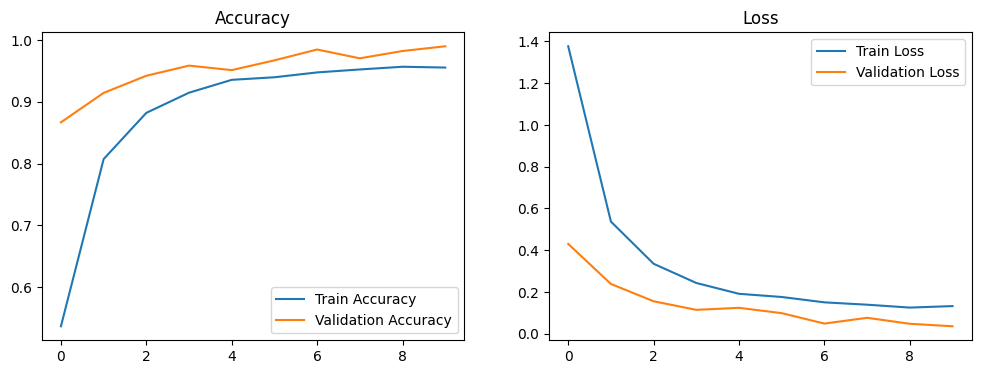

In [ ]:
# accuracy ra loss ko graph acc. to train and validation
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()


In [10]:
model.save('NSL_Model.keras')
print("Model saved as NSL_model.keras")


Model saved as NSL_model.keras
